# Context
This notebook drives the training process for different models.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../../project.env")
sys.path.append(os.environ["PYTHONPATH"])

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
import TRAIN.architecture.BERT.bert as bert

# Models

## Setup

In [3]:
import torch.nn as nn
import torch.optim as optim

In [4]:
TRAIN_classes = 'all-classes'

data_config = {
  "data_unit" : sup.DATA_S_PV,
  "label_col" : sup.class_numeric_column,
  "class_list" : TRAIN_classes,
  "batch_size" : 16,
  "PH2" : False,
  "PH3" : True,
  "reducer" : sup.PH3_REDUCER_NAME_PCA,
  "kernel" : '',
  "n" : 15,
}

train_config = {
  "arch" : sup.TRAIN_BERT_CODE,
  "device" : bert.device,
  "loadable" : bert.BERT_MINI,
  "optimizer" : optim.AdamW,
  "lr" : 1e-5,
  "weight_decay" : 0,
  "loss_fn" : nn.CrossEntropyLoss,
  "num_epochs" : 2000
}


In [5]:
sup.bert_score_tracker = []

model = bert.BERT(data_config=data_config, df=None, train_config=train_config)

In [6]:
model.df

,class_numeric,f0_0,f0_1,f0_2,f0_3,f0_4,f0_5,f0_6,f0_7,f0_8,...,f11_5,f11_6,f11_7,f11_8,f11_9,f11_10,f11_11,f11_12,f11_13,f11_14
0,28,-4.507717,-4.250702,3.810780,2.247274,0.565646,1.479007,-0.113582,-1.296985,-1.182858,...,1.374545,-0.339454,-0.940731,-0.905167,0.369000,-0.822049,0.827095,-0.574865,-0.504524,-0.560739
1,36,-3.376923,-3.393696,-0.115631,2.449672,0.344128,2.246915,-0.127182,1.064548,0.941346,...,1.828306,-0.658617,0.318692,0.031939,0.741984,-1.190653,0.412143,0.081653,-0.550336,-0.261609
2,29,-4.075545,-4.594226,3.028598,2.391631,0.895302,1.427418,-0.041040,0.490112,-2.005887,...,1.100357,-0.533747,0.198281,-2.143198,0.390659,-0.907695,1.169902,-1.490978,0.354484,-0.759917
3,30,-4.107187,-4.723617,2.667853,2.908067,1.777001,1.096583,-0.570944,-0.264265,-0.191434,...,0.732225,-0.699134,-0.195007,-0.347323,0.524342,-0.820741,1.692359,-0.114101,-0.265540,-0.844335
4,31,-3.305729,-5.034894,1.114000,3.052798,1.891613,1.158536,-0.731540,0.179608,0.463941,...,0.747529,-0.988953,-0.016021,0.591327,0.742952,-1.043043,1.009357,0.148009,-0.613278,-0.587036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,23,-4.464385,5.072107,-2.980314,-0.882318,0.351226,3.118749,-0.263826,0.911085,0.678703,...,3.327864,-0.072260,0.808310,0.472081,-0.522978,-0.086264,-0.042676,0.241127,-0.258628,-0.402439
3897,24,-5.856750,5.228807,-1.153569,-1.226374,0.886292,3.272766,0.483862,1.092294,0.861922,...,3.167920,-0.211146,-0.410885,0.576038,-0.472802,0.181163,0.885220,0.752630,-0.800943,-0.464034
3898,25,-3.359199,6.096525,-3.120418,-1.296896,0.419360,3.003073,-0.679870,-1.570864,-0.662724,...,2.957005,-0.567729,-1.273147,-0.113936,-0.854782,0.287885,-0.500945,0.214727,-0.276830,0.192784
3899,26,-4.516799,4.503335,-2.637540,-0.387702,1.469561,1.935978,-1.365814,-1.773367,0.877728,...,0.490026,-1.355147,-0.534379,0.115699,-1.436831,0.853222,-0.189053,0.401460,-0.560239,0.611721


In [7]:
model.fit(verbose=True)

In [8]:
model.test()
model.full_score()

0.8220230473751601
0.9039692701664532
0.8185382716529055
0.8288937966689065
0.8218566481724376


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:205: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.loss_fig.show()
/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:247: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.confusion_fig.show()


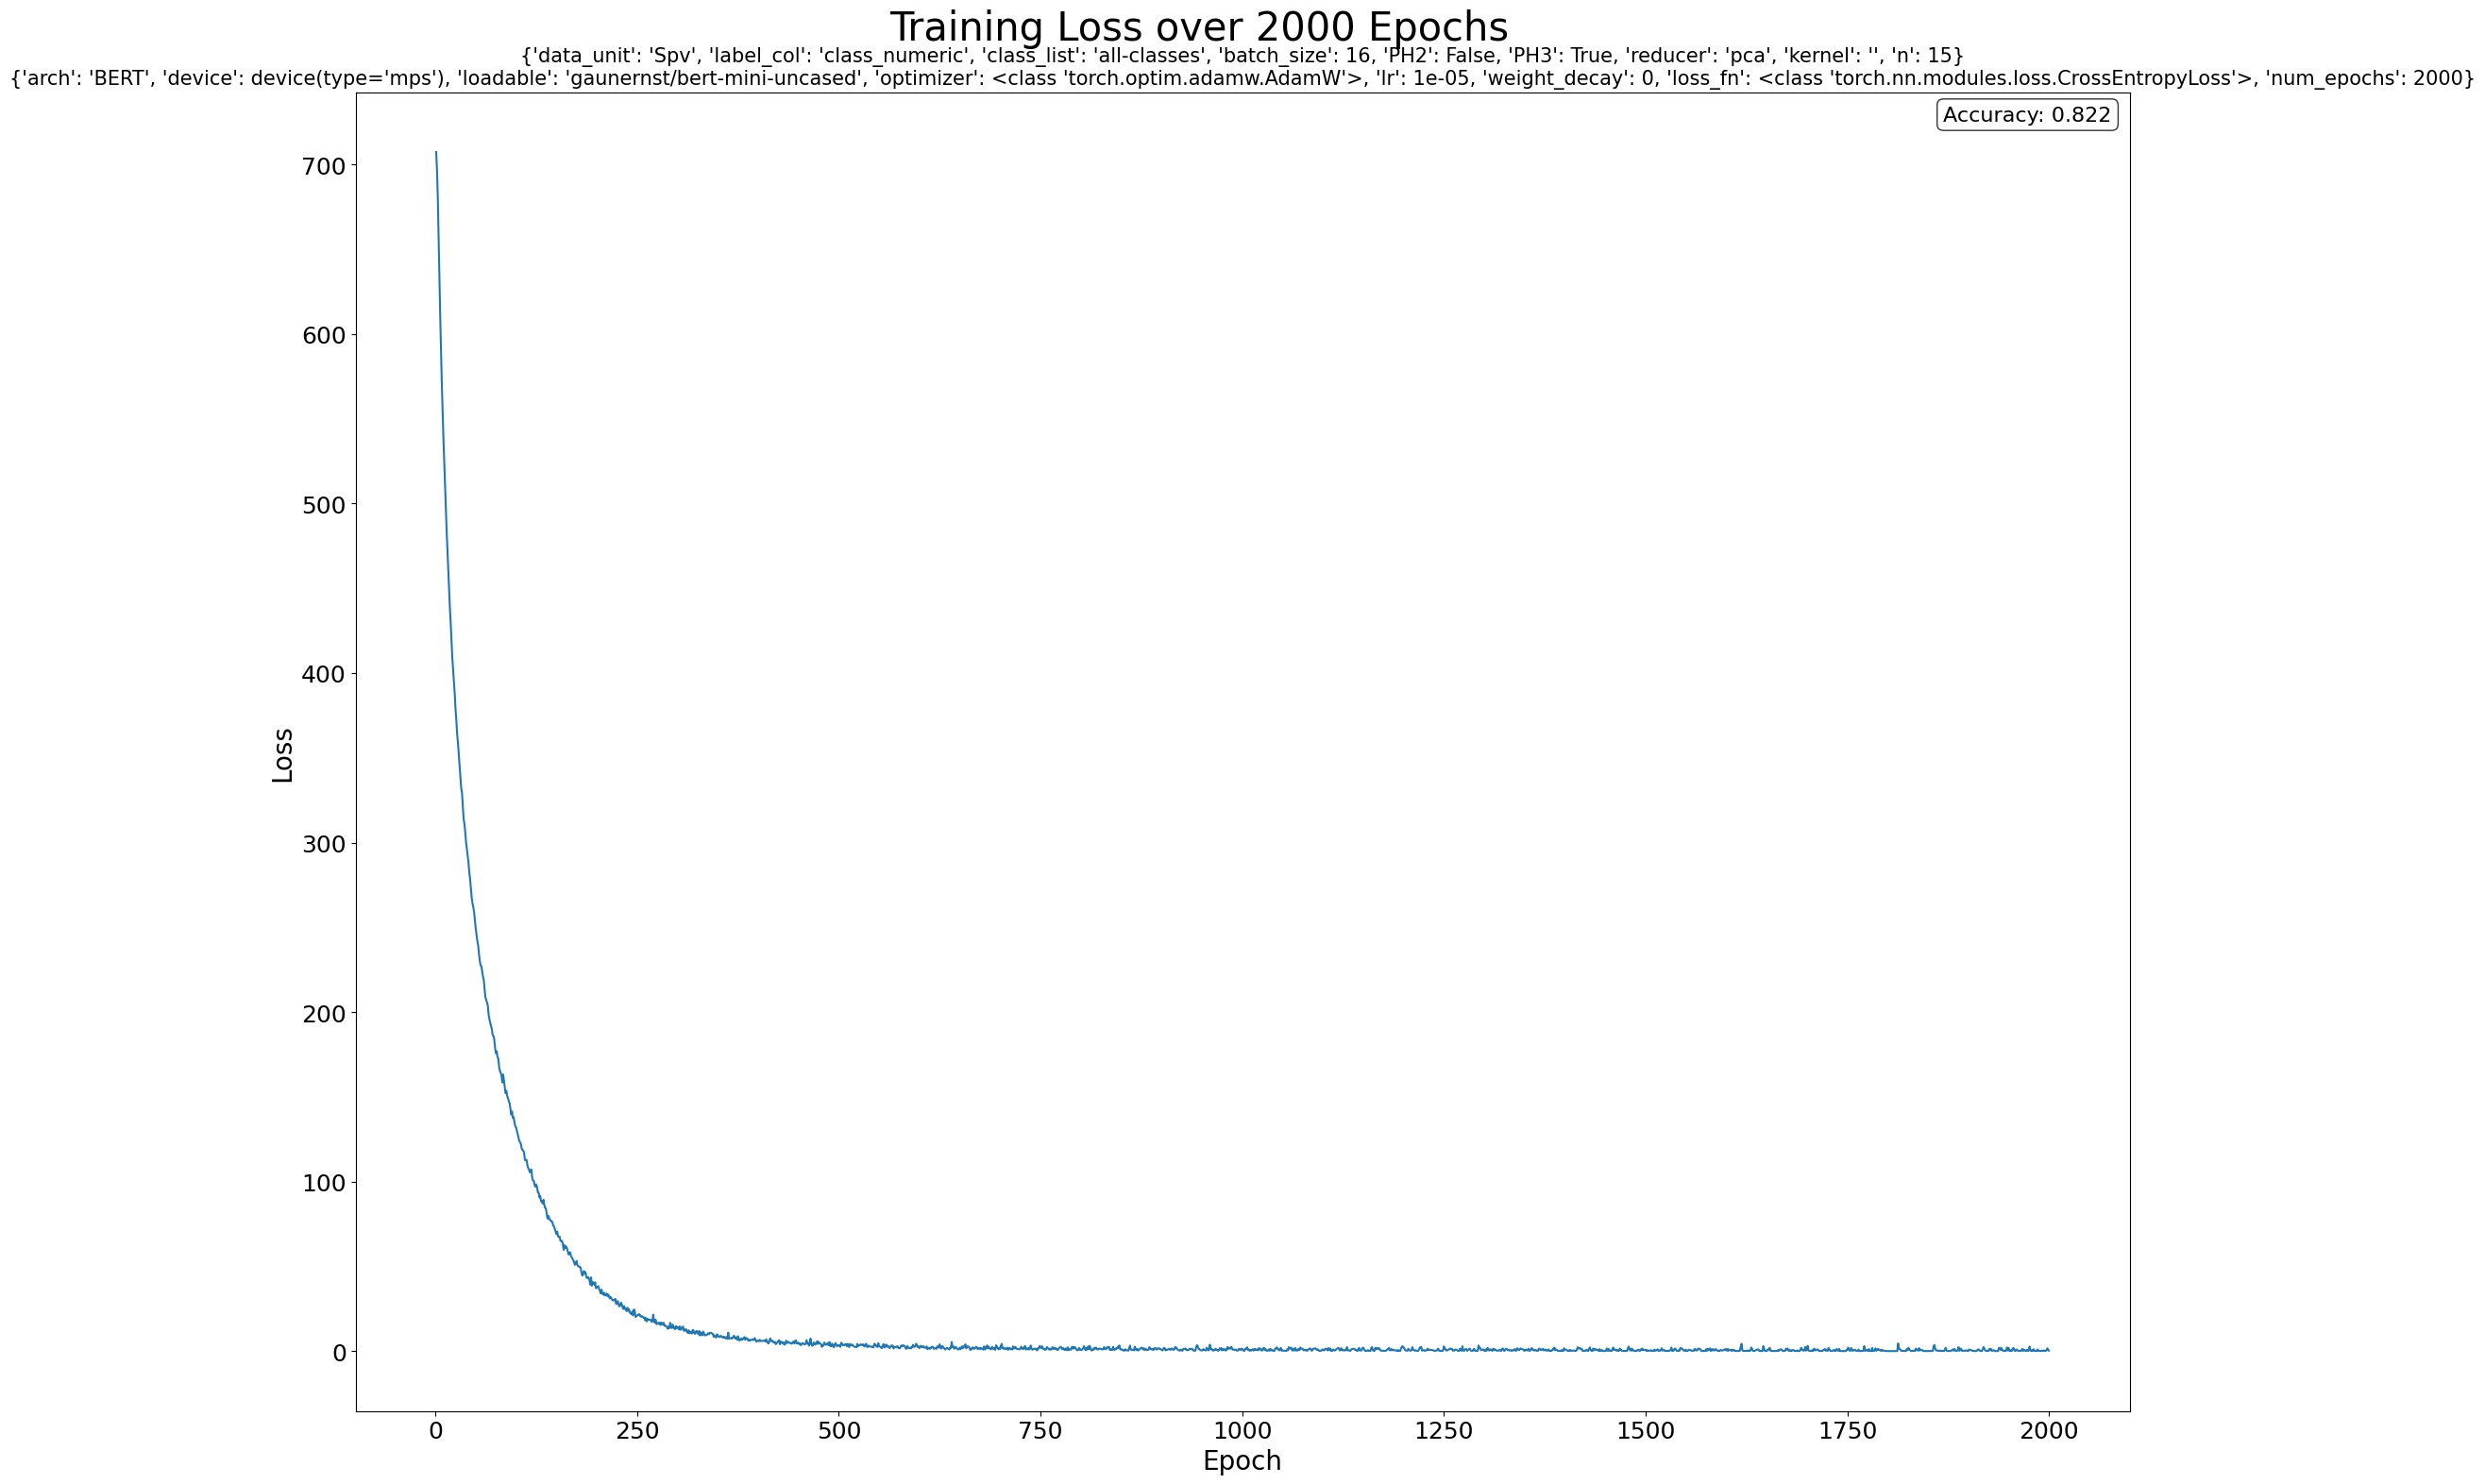

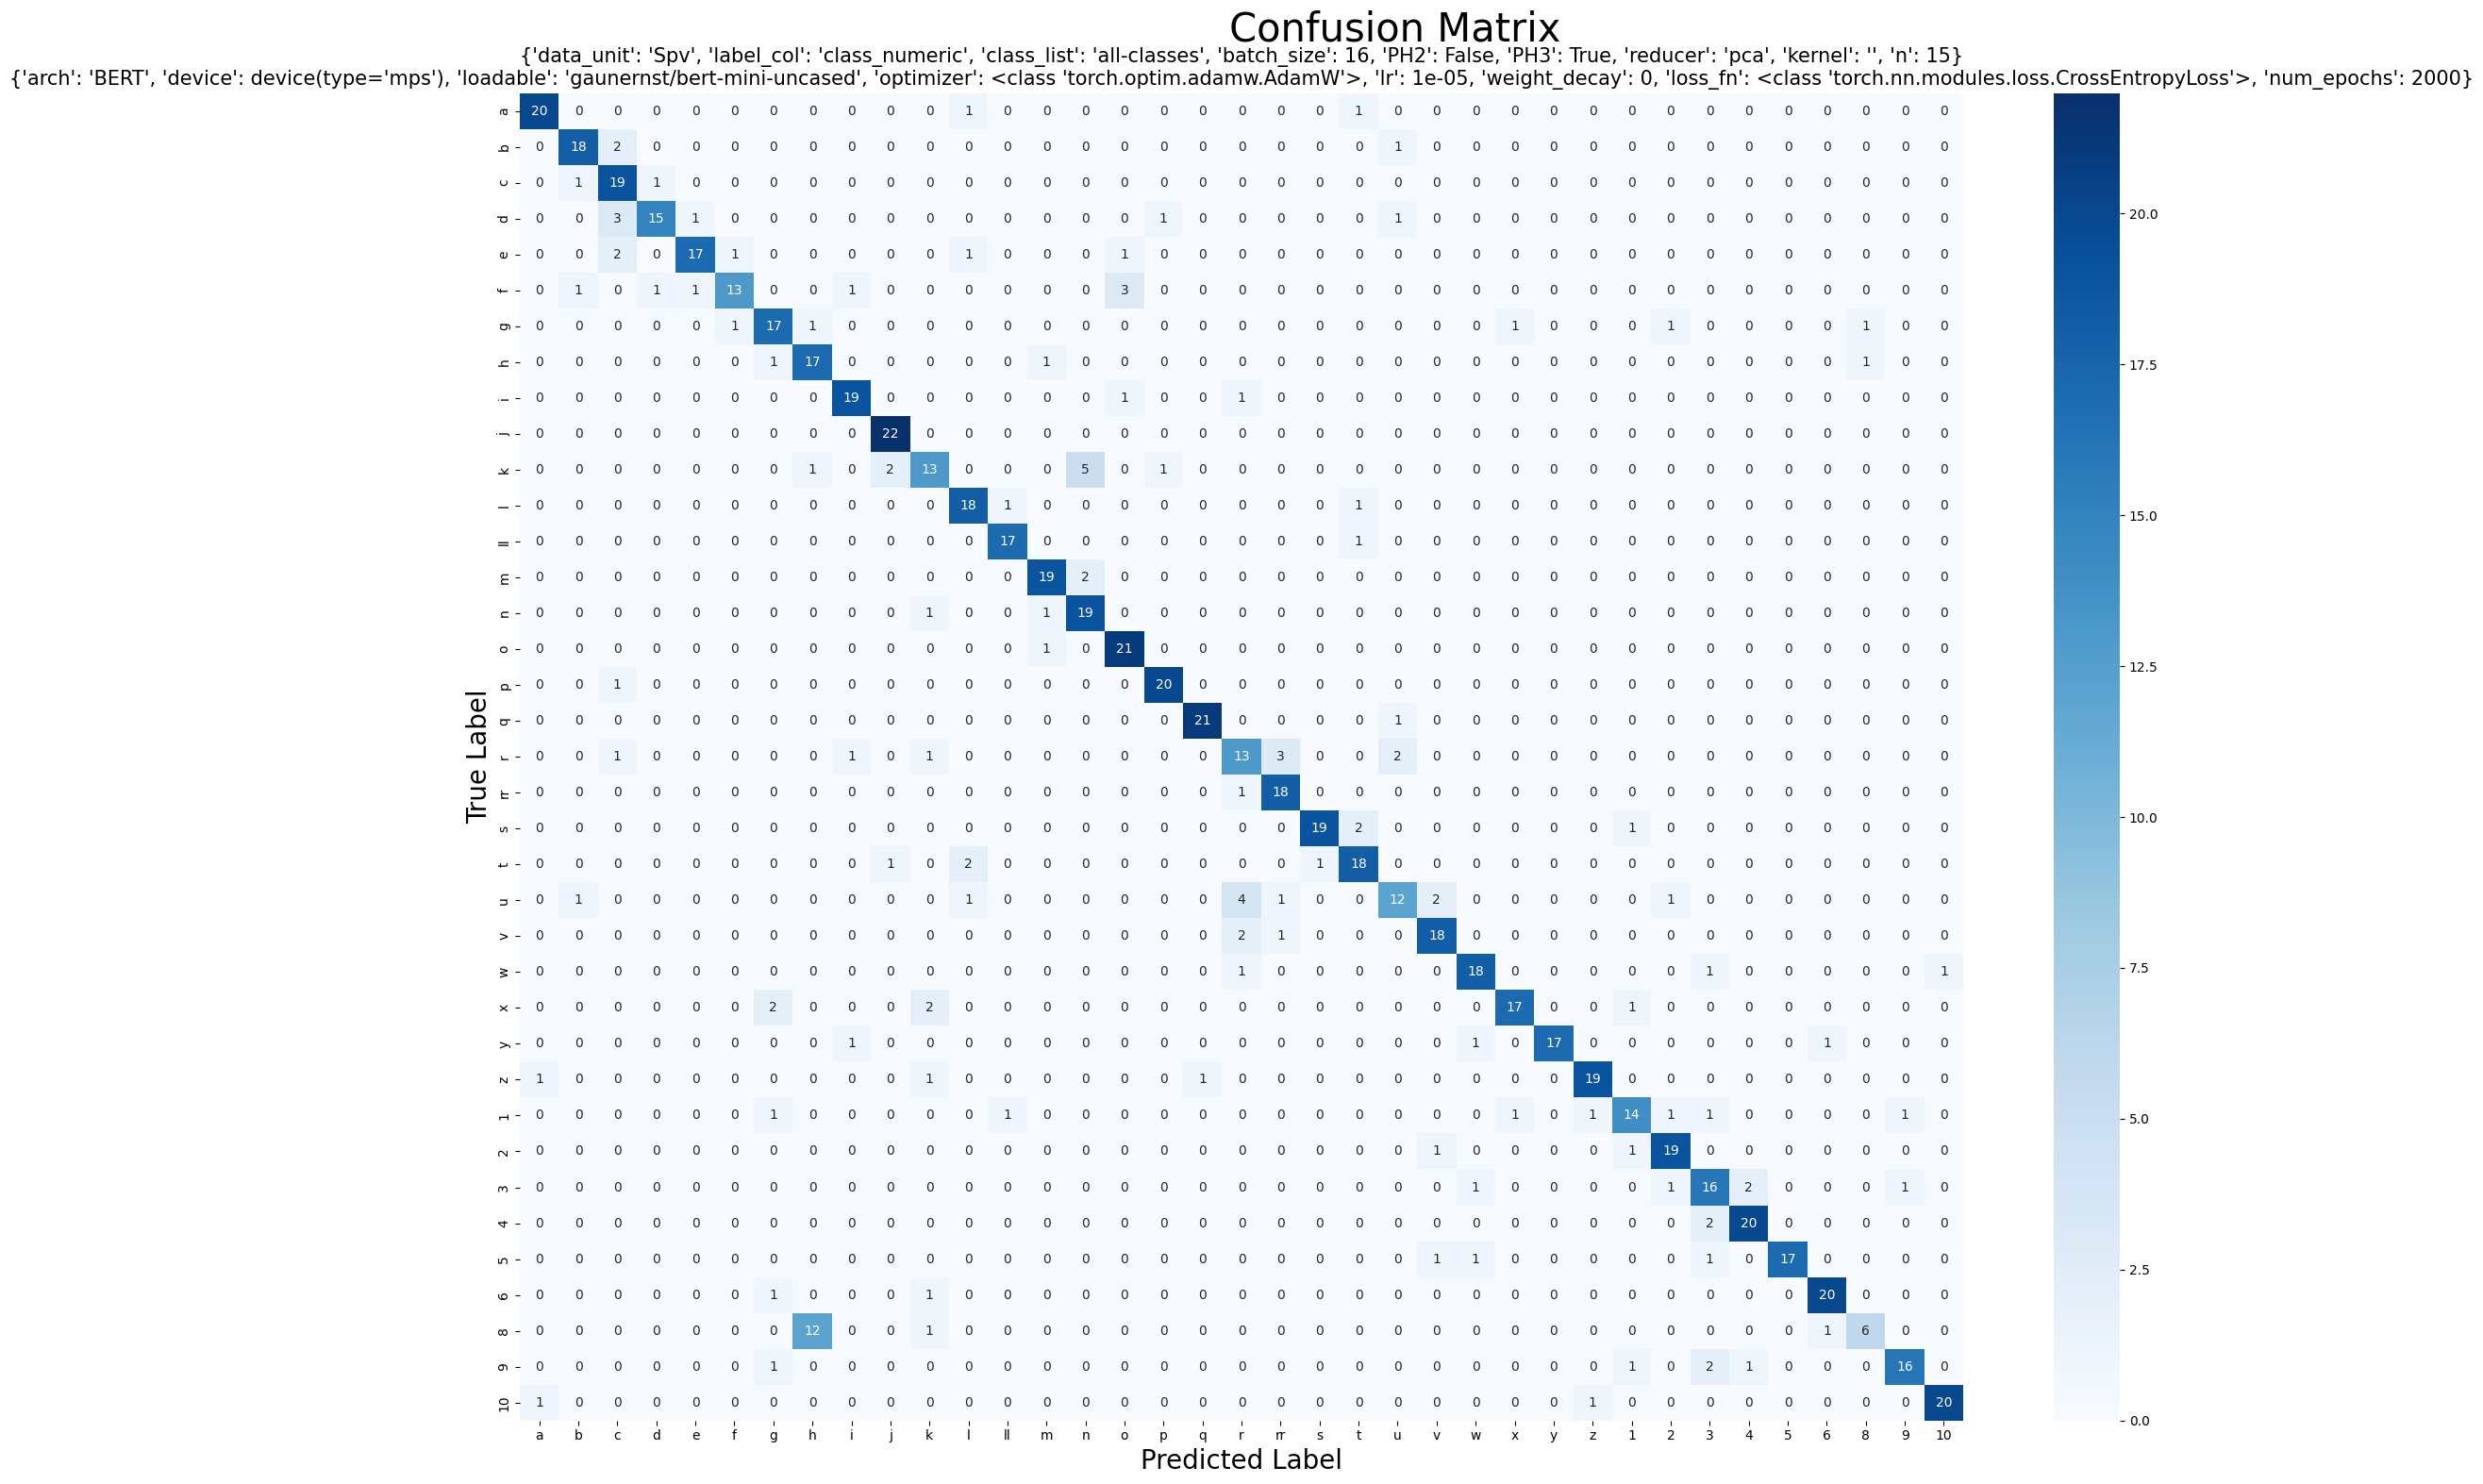

In [9]:
print(model.accuracy)
print(model.top2accuracy)
print(model.macro_f1)
print(model.macro_precision)
print(model.macro_recall)

model.show_loss()
model.show_confusion_matrix()

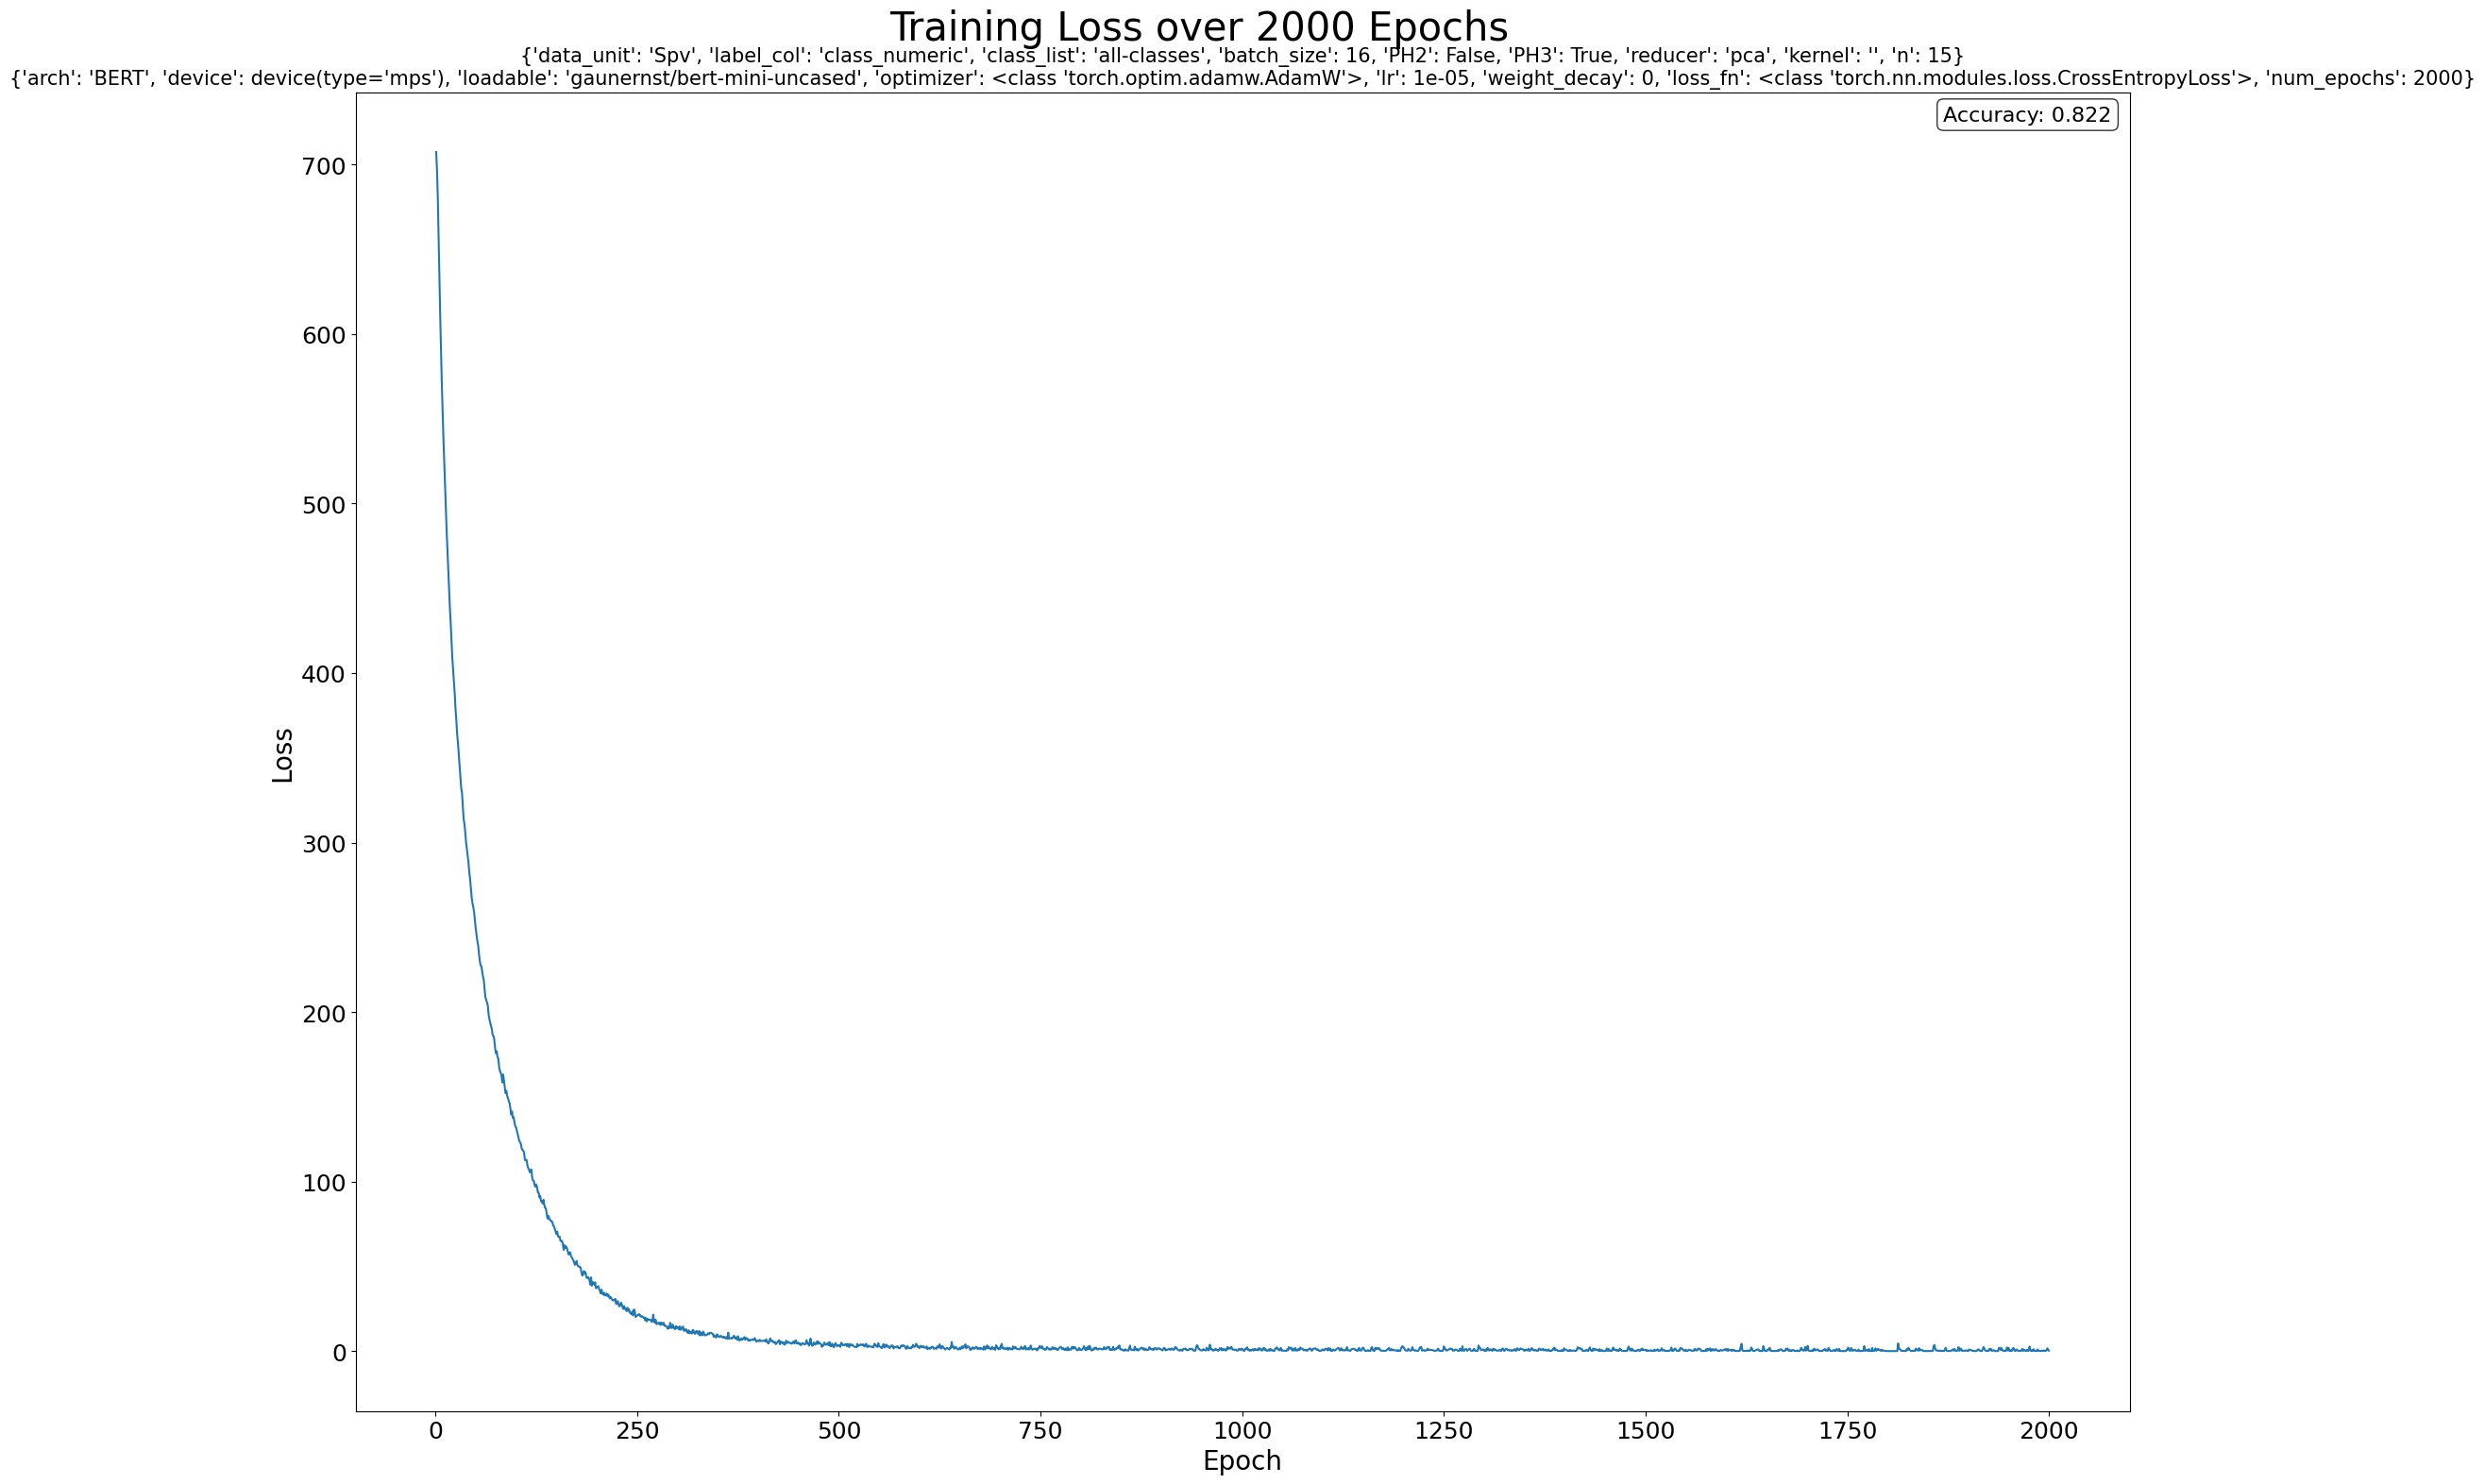

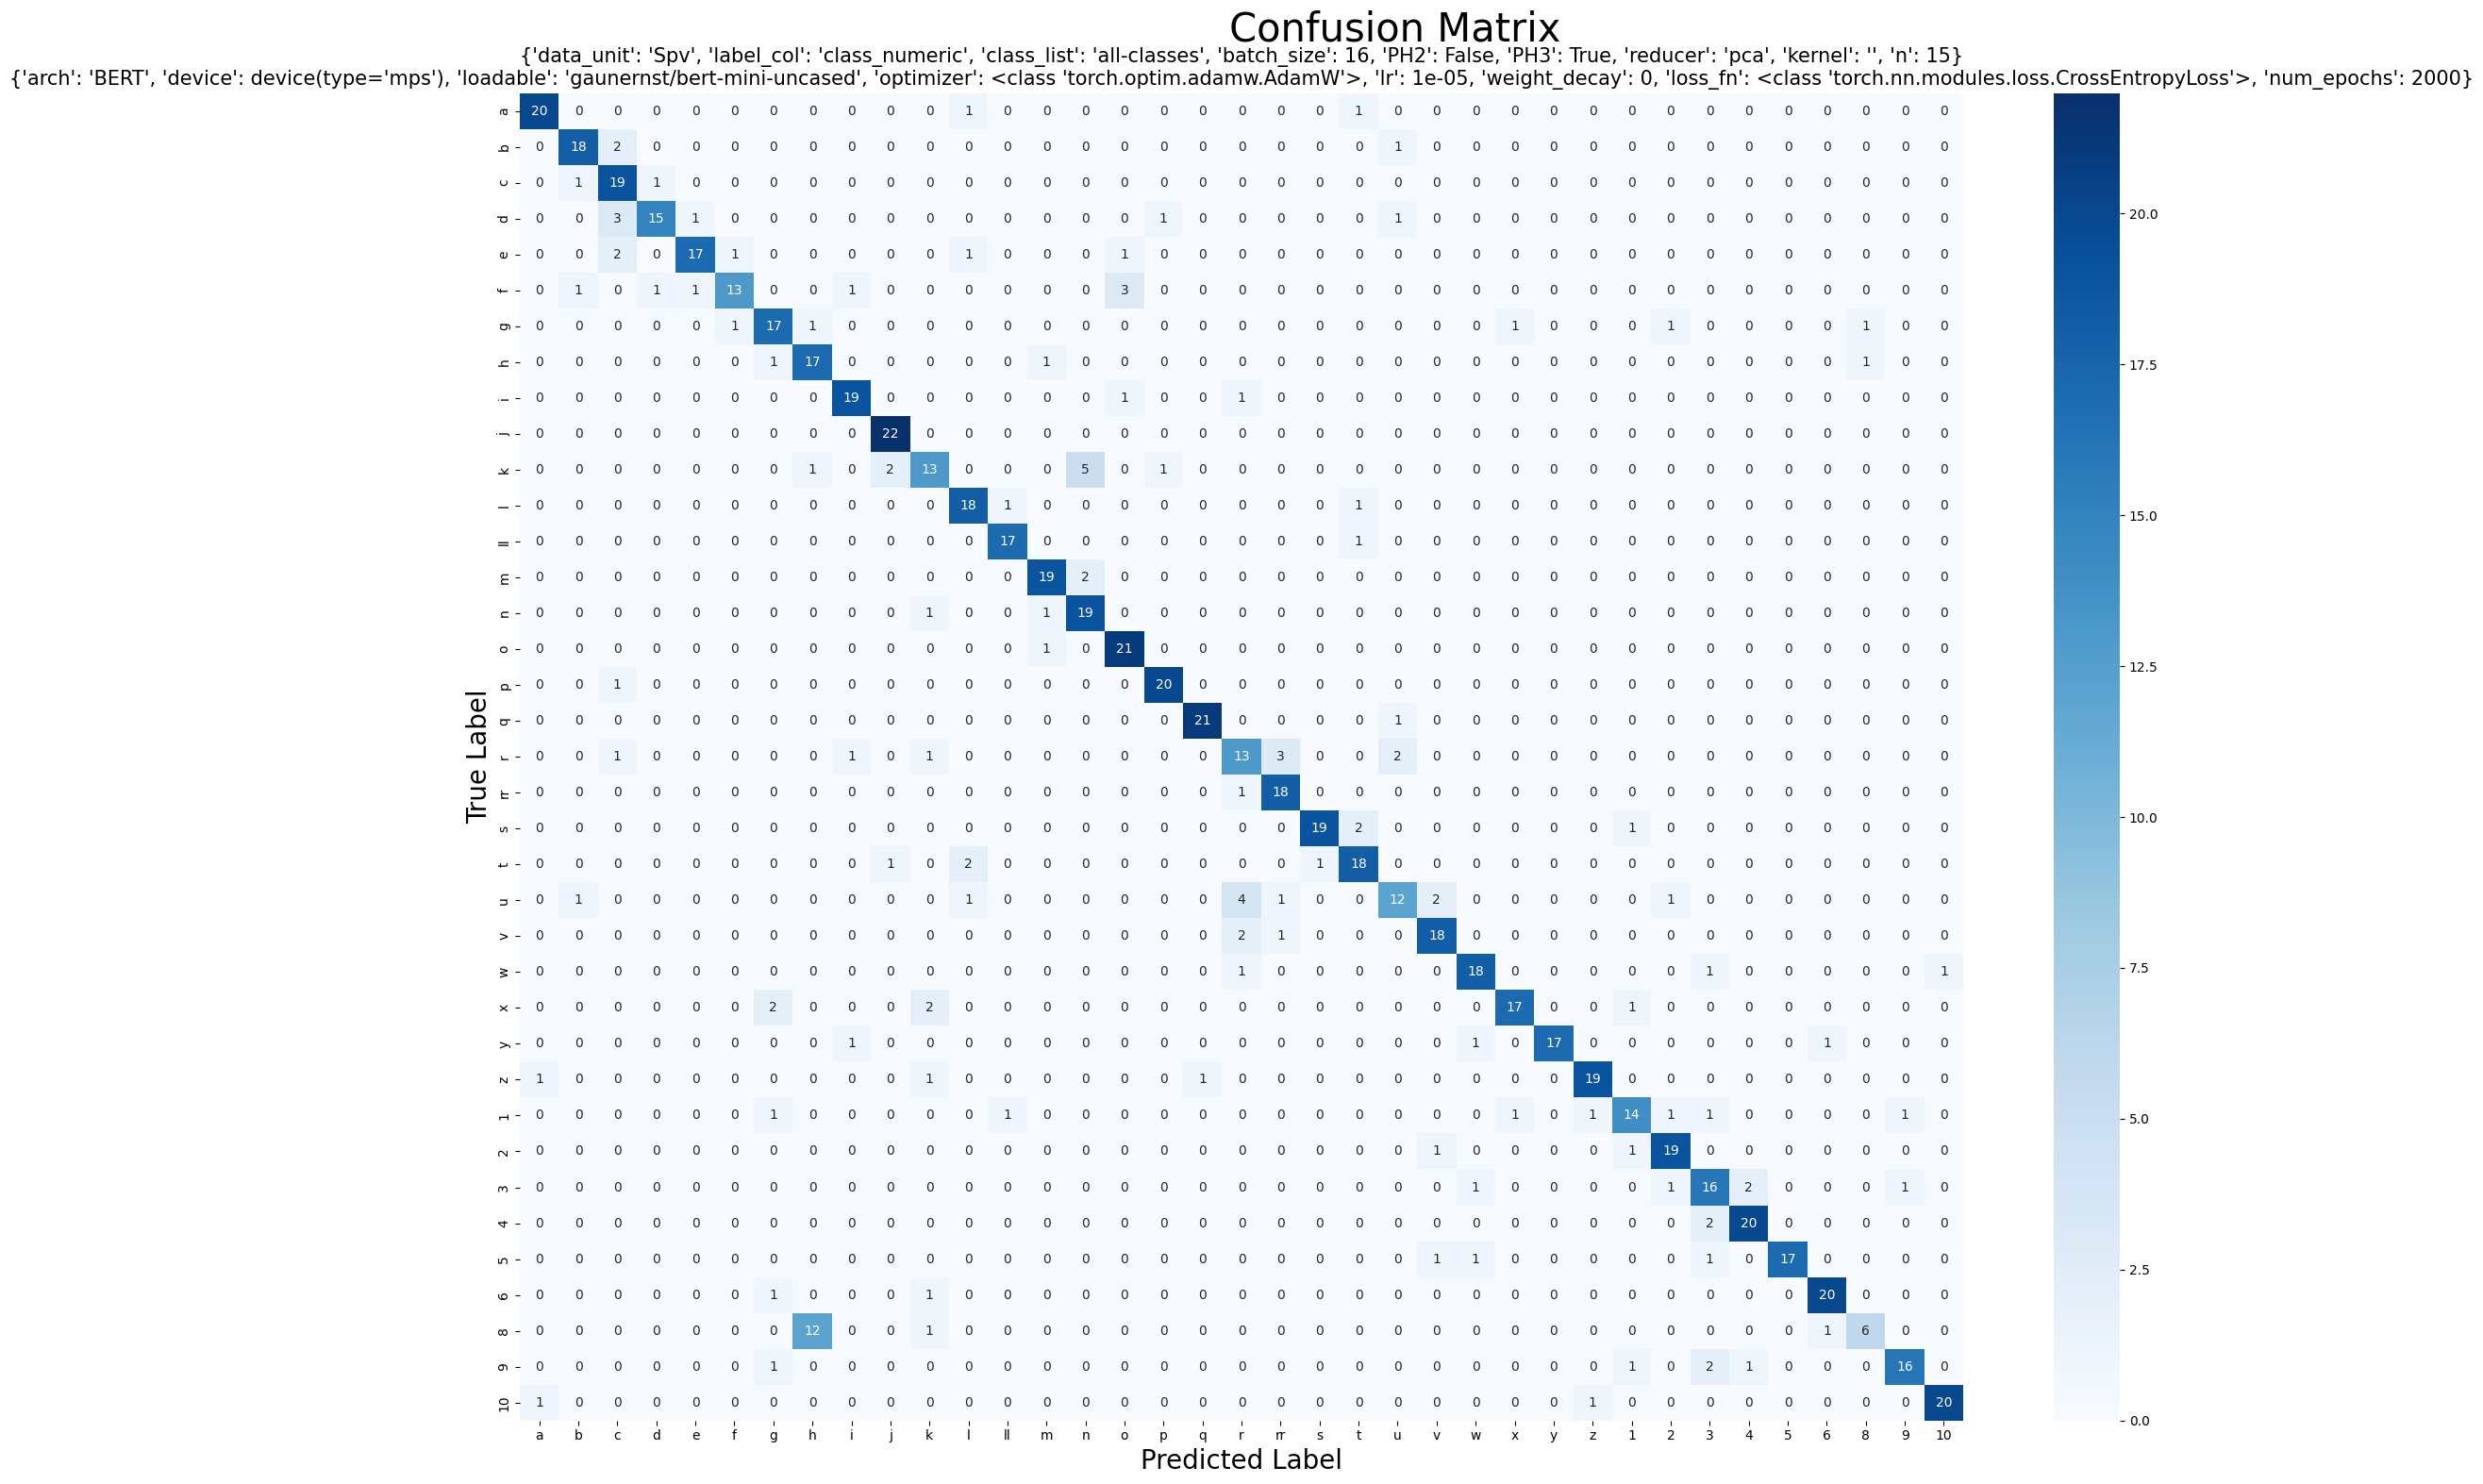

In [10]:
model.keep()
#bert.clean_bert()